In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier



In [2]:
df=pd.read_csv('/home/anu/Downloads/ad.data',header=None)
df

/home/anu/yes/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3274,170,94,0.5529,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3275,101,140,1.3861,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3276,23,120,5.2173,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3277,?,?,?,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.


In [3]:
df.isnull().sum()

0       0
1       0
2       0
3       0
4       0
       ..
1554    0
1555    0
1556    0
1557    0
1558    0
Length: 1559, dtype: int64

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/home/anu/yes/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/home/anu/yes/lib/python3.8/site-packages/pandas/core/frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


Best score :0.3f
Best parameter set
		clf__max_depth: 150
		clf__min_samples_leaf: 1
		clf__min_samples_split: 3
		clf__n_estimators: 50
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1401
           1       0.95      0.87      0.91       239

    accuracy                           0.98      1640
   macro avg       0.97      0.93      0.95      1640
weighted avg       0.98      0.98      0.98      1640



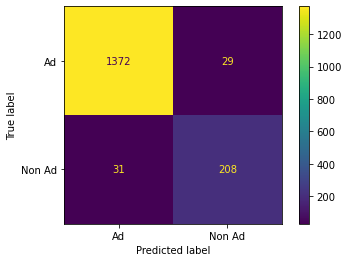

In [4]:
def main():
    df=pd.read_csv('/home/anu/Downloads/ad.data',header=None)
    #print(df)
    exp_col=set(df.columns.values)
    resp_col=df[len(df.columns.values)-1]
    
    y=[1 if e=='ad.' else 0 for e in resp_col]
    #print(y)
    
    exp_col.remove(len(df.columns.values)-1)
    x=df[list(exp_col)]
    x.replace(to_replace=' *\?',value=-1,regex=True,inplace=True)
    #print(x)
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.5,random_state=42)
    
    #Applying Decision Tree Classifier
    #pipeline=Pipeline([('clf',DecisionTreeClassifier(criterion='gini'))])
    #parameters={
        #'clf__max_depth':(150,155,160),
        #'clf__min_samples_leaf':(1,2,3)
    #}
    
    #Applying RandomForestClassifier
    pipeline=Pipeline([('clf',RandomForestClassifier(criterion='gini'))])
    parameters={
        'clf__max_depth':(150,155,160),
        'clf__min_samples_leaf':(1,2,3),
        'clf__n_estimators':(5,10,20,50),
        'clf__min_samples_split':(2,3)
    }
    #n_jobs=-1 to use whole processors
    grid_search=GridSearchCV(pipeline,parameters,n_jobs=-1,scoring='f1',verbose=1)
    grid_search.fit(xtrain,ytrain)
    
    print('Best score :0.3f'%grid_search.best_score_)
    print("Best parameter set")
    best_params=grid_search.best_estimator_.get_params()
    
    for param_name in sorted(parameters.keys()):
        print('\t\t%s: %r'%(param_name,best_params[param_name]))
    
    pred=grid_search.predict(xtest)
    print(classification_report(ytest,pred))
    
    model=DecisionTreeClassifier()
    model.fit(xtrain,ytrain)
    
    plot_confusion_matrix(model,xtest,ytest,display_labels=["Ad","Non Ad"])
    
if __name__=='__main__':
    main()